In [2]:
import os
from tqdm import tqdm_notebook as tqdm
import string

# data_dirpath = '/usr0/home/mamille2/erebor/fanfiction-project'
data_dirpath = '/usr0/home/mamille2/new_home/fanfiction' # misty

# Count occurrences of endpoints, measure cosine distance, find nearest neighbors

In [ ]:
import re

# Count occurrences of endpoints
endpoints = [
    'bad',
    'good',
    'fake', 
    'real',
    'different',
    'same',
]
endpoint_patterns = [r'\b' + term + r'\b' for term in endpoints]

# Load corpora
paths = [
    '/usr2/mamille2/fanfiction-project/data/ao3/seven_fandoms_random3000.txt',
    '/usr2/mamille2/coca/fiction_paras.txt',
    '/usr0/home/mamille2/new_home/fanfiction/data/challenges_seven_fandoms.txt',
    '/usr0/home/mamille2/new_home/fanfiction/data/aspirational_seven_fandoms.txt',
]

lines = []
for path in tqdm(paths):
     with open(path) as f:
            corpus = f.read()
            corpus_name = os.path.split(path)[-1]
            for endpoint, pattern in zip(endpoints, endpoint_patterns):
                result = re.findall(pattern, corpus)
                term_count = len(result)
                lines.append([corpus_name, endpoint, term_count])
                
endpoints_count = pd.DataFrame(lines, columns=['corpus', 'endpoint', 'count'])
endpoints_count

In [24]:
# Look up nearest neighbors for endpoints in different corpora
import gensim

# Load embeddings
embs_basepath = "/usr2/mamille2/fanfiction-project/models/fasttext/"
extension = '.vec'

embs_paths = [
    'seven_fandoms_random3000',
#     'coca_fiction',
    'aspirational_seven_fandoms',
    'challenges_seven_fandoms',
]

embs = {}
for path in tqdm(embs_paths):
# for path in tqdm(['challenges_seven_fandoms']):
    print(path)
    test_path = os.path.join(embs_basepath, f'{path}.vec')
    embs[path] = gensim.models.KeyedVectors.load_word2vec_format(test_path)
    
#     for endpoint in endpoints:
#         print(endpoint)
#         neighbors = embs[path].most_similar(positive=endpoint, topn=30)
#         for n in neighbors:
#             print(n)
#         print()

seven_fandoms_random3000
aspirational_seven_fandoms
challenges_seven_fandoms


In [26]:
# Measure distance between terms
import scipy

# corpus = 'challenges_seven_fandoms'
word1 = "i"
word2 = "same"
word3 = "different"

for corpus in embs_paths:
    print(corpus)
    print(scipy.spatial.distance.cosine(embs[corpus][word1], embs[corpus][word2]))
    print(scipy.spatial.distance.cosine(embs[corpus][word1], embs[corpus][word3]))

seven_fandoms_random3000
0.3669670820236206
0.46936655044555664
aspirational_seven_fandoms
0.330685555934906
0.41472387313842773
challenges_seven_fandoms
0.34805530309677124
0.38014495372772217


In [28]:
# Measure distance between terms
import scipy

# corpus = 'challenges_seven_fandoms'
word1 = "we"
word2 = "same"
word3 = "different"

for corpus in embs_paths:
    print(corpus)
    print(scipy.spatial.distance.cosine(embs[corpus][word1], embs[corpus][word2]))
    print(scipy.spatial.distance.cosine(embs[corpus][word1], embs[corpus][word3]))

seven_fandoms_random3000
0.372511088848114
0.40644627809524536
aspirational_seven_fandoms
0.3100166320800781
0.3631178140640259
challenges_seven_fandoms
0.33667272329330444
0.38338249921798706


In [31]:
# Measure distance between terms
import scipy

# corpus = 'challenges_seven_fandoms'
word1 = "trans"
word2 = "same"
word3 = "different"

for corpus in embs_paths:
    print(corpus)
    print(scipy.spatial.distance.cosine(embs[corpus][word1], embs[corpus][word2]))
    print(scipy.spatial.distance.cosine(embs[corpus][word1], embs[corpus][word3]))

seven_fandoms_random3000
0.45567578077316284
0.4437718987464905
aspirational_seven_fandoms
0.4284375309944153
0.41233277320861816
challenges_seven_fandoms
0.45574843883514404
0.4365394115447998


In [ ]:
# Measure cosine distance between endpoints for different embeddings

# Plot words on axes

In [47]:
# Load top terms values on axes
import pandas as pd

# fpath = os.path.join(data_dirpath, 'output/semaxis', 'semaxis_fanfiction_embedding_comparison.csv')
fpaths = [
#     os.path.join(data_dirpath, 'output/semaxis', 'seven_fandoms_random1000_semaxis_results.csv'),
    os.path.join(data_dirpath, 'output/semaxis', 'seven_fandoms_random3000_semaxis_results.csv'),
#     os.path.join(data_dirpath, 'output/semaxis', 'coca_fiction_semaxis_results.csv'),
    os.path.join(data_dirpath, 'output/semaxis', 'aspirational_seven_fandoms_semaxis_results.csv'),
    os.path.join(data_dirpath, 'output/semaxis', 'challenges_seven_fandoms_semaxis_results.csv'),
         ]
# data = pd.read_csv(fpath, header=0, index_col=None, names = ['embeddings', 'term', 'axis', 'value', 'extra'])
dfs = [pd.read_csv(fpath, header=0, index_col=None) for fpath in fpaths]
data = pd.concat(dfs)
# data

# Rename embedding columns
print(data['embeddings'].unique())

name_transform = {
    'seven_fandoms_random3000': 'fanfiction',
    'coca_fiction': 'mainstream fiction',
    'aspirational_seven_fandoms': 'aspirational',
    'challenges_seven_fandoms': 'challenges',
}
for k,v in name_transform.items():
    data['embeddings'] = data['embeddings'].str.replace(k, v)
print(data['embeddings'].unique())

# Check filled-in

axis_data = {}
for axis in data['axis'].unique():
    print(axis)
    axis_data[axis] = data[data['axis'] == axis]
    print(len(axis_data[axis]))

['seven_fandoms_random3000' 'aspirational_seven_fandoms'
 'challenges_seven_fandoms']
['fanfiction' 'aspirational' 'challenges']
('different', 'same')
42
('fake', 'real')
42
('bad', 'good')
42


In [13]:
data.columns

Index(['embeddings', 'term', 'axis', 'value'], dtype='object')

In [15]:
# data[(data['term']=='transgender') && (data['axis']==('bad', 'good'))]
data[data['term']=='transgender']

,embeddings,term,axis,value
0,seven_fandoms_random3000,transgender,"('different', 'same')",-0.102389
1,seven_fandoms_random3000,transgender,"('fake', 'real')",0.064841
2,seven_fandoms_random3000,transgender,"('bad', 'good')",-0.040481
0,coca_fiction,transgender,"('different', 'same')",-0.119104
1,coca_fiction,transgender,"('fake', 'real')",0.138714
2,coca_fiction,transgender,"('bad', 'good')",-0.040960


['transgender', 'trans', 'queer', 'lesbian', 'gay', 'homosexual']
['heterosexual', 'cisgender', 'cis']


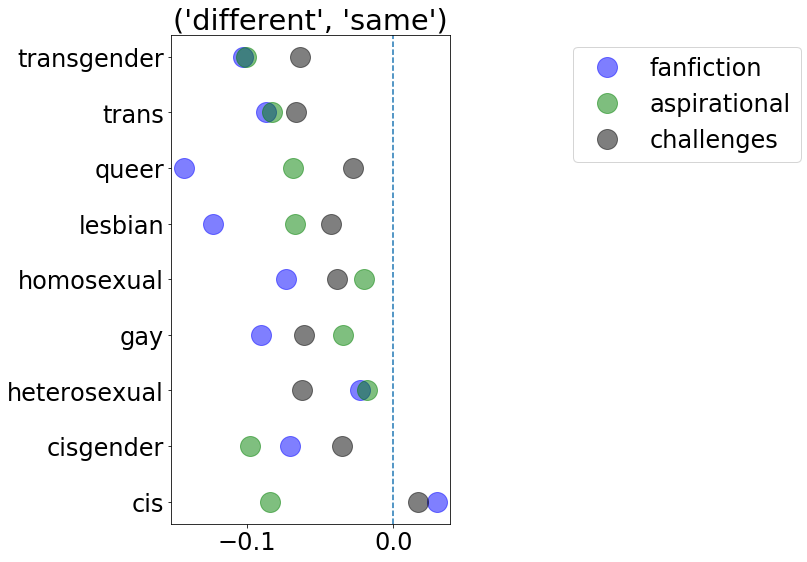

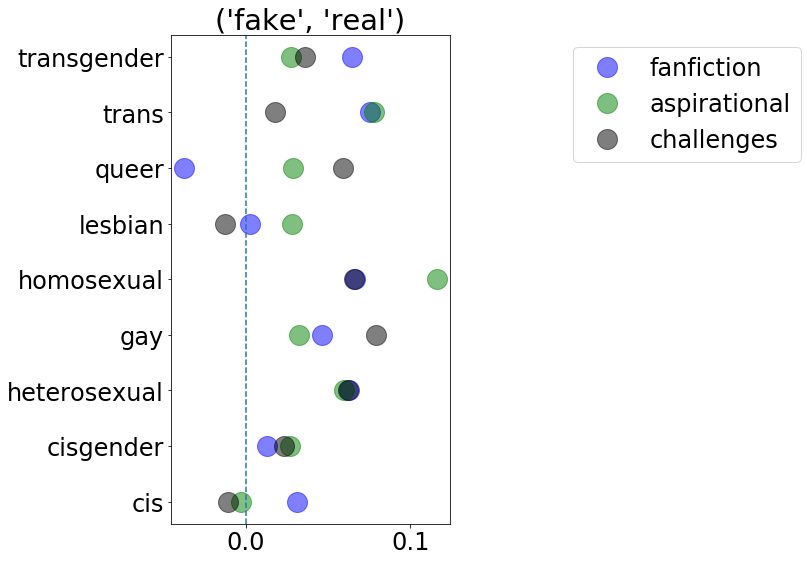

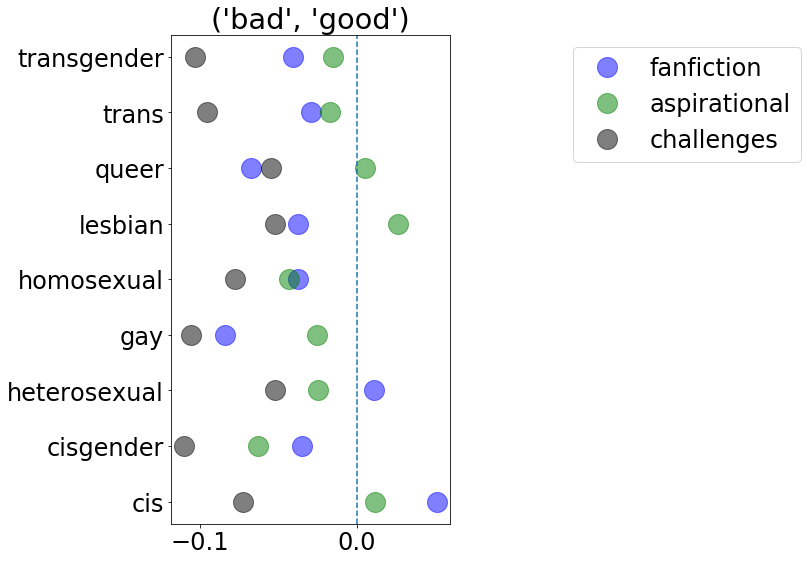

In [49]:
import matplotlib

# colors = ['b', 'g', 'y', 'r', 'black']
colors = ['b', 'g', 'black', 'orange']
colormap = dict(zip(data['embeddings'].unique(), colors))
colormap

# marked_labels = list(reversed(['transgender', 'trans', 'queer', 'lesbian', 'gay', 'homosexual']))
# unmarked_labels = list(reversed(['heterosexual', 'cisgender', 'cis']))
marked_labels = ['transgender', 'trans', 'queer', 'lesbian', 'gay', 'homosexual']
unmarked_labels = ['heterosexual', 'cisgender', 'cis']
print(marked_labels)
print(unmarked_labels)

%matplotlib inline

import matplotlib.pyplot as plt
import re

# Change font
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 24}

matplotlib.rc('font', **font)

# plt.scatter(axis_data[axis]['value'], axis_data[axis]['term'], c=[colormap[e] for e in axis_data[axis]['embeddings'].tolist()])
for axis in axis_data:
    plt.figure(figsize=(5,9))
    plt.title(axis)
    for e in data['embeddings'].unique():
        emb_data = axis_data[axis][axis_data[axis]['embeddings']==e]
        marked_data = emb_data[emb_data['term'].isin(marked_labels)].sort_values(['term'])
        unmarked_data = emb_data[emb_data['term'].isin(unmarked_labels)].sort_values(['term'])
#         plt.plot(emb_data['value'], emb_data['term'], '.', c=colormap[e], ms=15, label=e)
        plt.plot(unmarked_data['value'], unmarked_data['term'], 'o', c=colormap[e], ms=20, alpha=0.5, label=e)
        plt.plot(marked_data['value'], marked_data['term'], 'o', c=colormap[e], alpha=0.5, ms=20)

    plt.legend(loc='upper right', bbox_to_anchor=((2.3, 1)))
    plt.axvline(x=0, linestyle='--')
    axis_escaped = re.sub(r'[\'\"() ]', '', axis)
    axis_escaped = re.sub(r',', '_', axis_escaped)
    plt.savefig(os.path.join(data_dirpath, 'output/semaxis', f'{axis_escaped}.png'), dpi=100, bbox_inches='tight')
#     plt.savefig(os.path.join(data_dirpath, 'output/semaxis', f'{axis_escaped}_fiction_fanfiction.png'), dpi=100, bbox_inches='tight')
    plt.show()

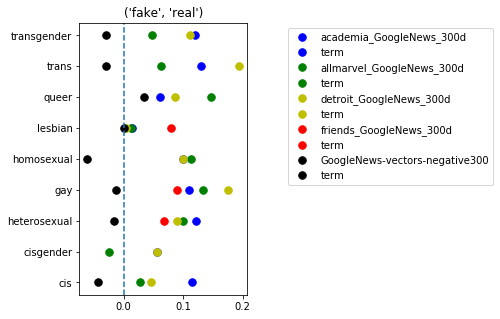

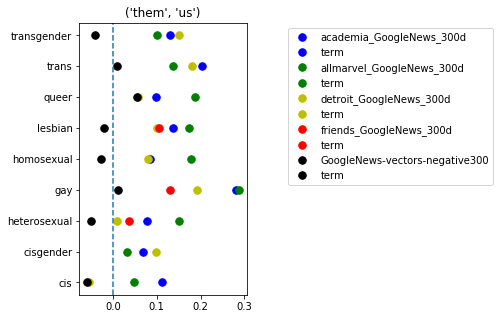

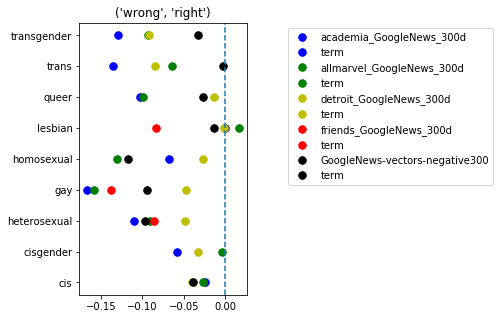

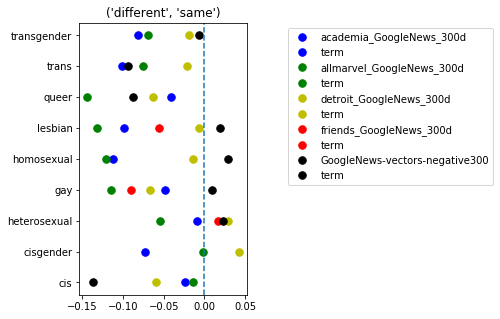

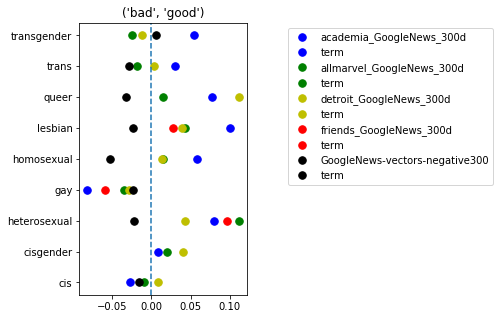

In [18]:
# Old results

%matplotlib inline

import matplotlib.pyplot as plt
import re

# plt.scatter(axis_data[axis]['value'], axis_data[axis]['term'], c=[colormap[e] for e in axis_data[axis]['embeddings'].tolist()])
for axis in axis_data:
    plt.figure(figsize=(3,5))
    plt.title(axis)
    for e in data['embeddings'].unique():
        emb_data = axis_data[axis][axis_data[axis]['embeddings']==e]
        marked_data = emb_data[emb_data['term'].isin(marked_labels)].sort_values(['term'])
        unmarked_data = emb_data[emb_data['term'].isin(unmarked_labels)].sort_values(['term'])
#         plt.plot(emb_data['value'], emb_data['term'], '.', c=colormap[e], ms=15, label=e)
        plt.plot(unmarked_data['value'], unmarked_data['term'], '.', c=colormap[e], ms=15, label=e)
        plt.plot(marked_data['value'], marked_data['term'], '.', c=colormap[e], ms=15)

    plt.legend(loc='upper right', bbox_to_anchor=((2.5, 1)))
    plt.axvline(x=0, linestyle='--')
    axis_escaped = re.sub(r'[\'\"() ]', '', axis)
    axis_escaped = re.sub(r',', '_', axis_escaped)
    plt.savefig(os.path.join(data_dirpath, 'fanfiction-project/output/semaxis', f'{axis_escaped}.png'), dpi=100, bbox_inches='tight')
    plt.show()

# Get baseline confidence interval

In [2]:
# Load top terms values on axes
import pandas as pd

fpath = os.path.join(data_dirpath, 'fanfiction-project/output/semaxis', 'nyt_top1000words_semaxis_results.csv')
nyt_results = pd.read_csv(fpath)
nyt_results

,embeddings,term,axis,value
0,nyt_top1000words,new,"('them', 'us')",0.004348
1,nyt_top1000words,new,"('fake', 'real')",0.113602
2,nyt_top1000words,new,"('wrong', 'right')",-0.095814
3,nyt_top1000words,n't,"('them', 'us')",0.028046
4,nyt_top1000words,n't,"('fake', 'real')",0.091709
5,nyt_top1000words,n't,"('wrong', 'right')",-0.075451
6,nyt_top1000words,would,"('them', 'us')",0.102890
7,nyt_top1000words,would,"('fake', 'real')",0.188158
8,nyt_top1000words,would,"('wrong', 'right')",-0.052862
9,nyt_top1000words,percent,"('them', 'us')",0.023344


In [4]:
len(nyt_results['term'].unique())

973

In [10]:
# See distributions for axes
axis_dist = {}
for axis in nyt_results['axis'].unique():
    print(axis)
    axis_dist[axis] = nyt_results.loc[nyt_results['axis'] == axis, 'value'].values
    
axis_dist["('fake', 'real')"]

('them', 'us')
('fake', 'real')
('wrong', 'right')


array([ 0.11360192,  0.09170891,  0.18815841,  0.02939717,  0.18103096,
        0.06978121,  0.02299878, -0.00177759,  0.17524764,  0.03274381,
        0.07241034,  0.10961813,  0.02025259,  0.00089419,  0.09737522,
       -0.13617651, -0.02379639, -0.03381937,  0.00217267,  0.26692235,
        0.06637347,  0.19022427, -0.01691672, -0.05087386,  0.10531905,
        0.05912087,  0.12762856, -0.07347866,  0.06436333,  0.03261097,
       -0.04367527,  0.04207807,  0.0242374 ,  0.01425941, -0.00216604,
       -0.04058024,  0.13255045,  0.08399282,  0.13719325, -0.07296344,
        0.15302724, -0.03657283,  0.12265543,  0.11368559,  0.0536822 ,
        0.06474252,  0.12132842, -0.06039457,  0.16761857, -0.21490683,
        0.12062783, -0.11311671,  0.03720318, -0.00646171,  0.07330344,
        0.06329066,  0.01069142, -0.03581713, -0.06533243, -0.00319812,
        0.01685843, -0.22036186, -0.01366182,  0.08416401, -0.15005562,
       -0.05424361, -0.04461847,  0.06079474,  0.06836494, -0.15

In [15]:
print(min(axis_dist["('fake', 'real')"]))
print(max(axis_dist["('fake', 'real')"]))

-0.24587997794151306
0.2748489081859589


In [17]:
import statsmodels.stats.api as sms
sms.DescrStatsW(axis_dist["('fake', 'real')"]).tconfint_mean()

(0.008641868362037092, 0.019775047472228816)

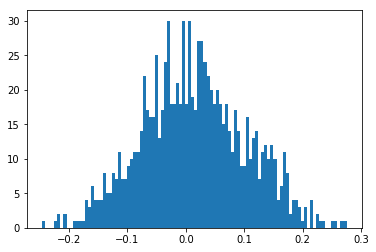

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.hist(axis_dist["('fake', 'real')"], bins=100)
plt.show()

In [3]:
# Load top 1000 words (don't think I need to do this)

rm_list = [
    'u.s',
    'nyt',
    'undated',
    'cox',
    'bloomberg',
    'n.y',
    'calif',
    'nytsf',
    'congressional',
    'hns',
    'ladn',
    'feb',
    'economist',
    'fla',
    'gop',
    'palestinian',
    'kosovo',
    'gingrich',
    'philadelphia',
    'warner',
    'fbn',
    'nbc',
    'bosnia',
    'cbs',
    'n.j',
    'lakers',
    'coxnet',
]

with open(os.path.join(data_dirpath, 'nyt', 'nyt_top1000words.txt'), 'r') as f:
    words = [w for w in f.read().splitlines() if not w in rm_list]
    
len(words)

973

## Compile large sample of words

In [2]:
# Load NYT data
fpath = os.path.join(data_dirpath, 'nyt_preprocessed.txt')

with open(fpath) as f:
    lines = [l for l in f.read().splitlines() if len(l) > 0]
    
print(len(lines))
lines[:10]

159416980


['',
 '',
 'witness says o.j . simpson bought knife weeks before slayings',
 '',
 '',
 'los angeles   ( bc - simpson - killings-1stld-3takes - writethru - ladn )',
 '',
 '',
 '',
 "with the nation 's attention riveted again on a los"]

In [36]:
import nltk
stops = [r'{}+'.format(re.escape(c)) for c in string.punctuation] + [r'\d+'] + nltk.corpus.stopwords.words('english') + \
            ['bc']
stops

['\\!+',
 '\\"+',
 '\\#+',
 '\\$+',
 '\\%+',
 '\\&+',
 "\\'+",
 '\\(+',
 '\\)+',
 '\\*+',
 '\\++',
 '\\,+',
 '\\-+',
 '\\.+',
 '\\/+',
 '\\:+',
 '\\;+',
 '\\<+',
 '\\=+',
 '\\>+',
 '\\?+',
 '\\@+',
 '\\[+',
 '\\\\+',
 '\\]+',
 '\\^+',
 '_+',
 '\\`+',
 '\\{+',
 '\\|+',
 '\\}+',
 '\\~+',
 '\\d+',
 'i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'again

In [6]:
from collections import Counter

words_ctr = Counter([w for l in lines for w in l.split() if w != ''])
words_ctr.most_common(500)

[(',', 56765629),
 ('the', 54116608),
 ('.', 51299417),
 ('to', 23854728),
 ('of', 23456065),
 ('a', 22713174),
 ('-', 21526421),
 ('and', 21272132),
 ('in', 18678270),
 ('``', 11142690),
 ("''", 10965202),
 ('that', 10274801),
 ("'s", 10234104),
 ('for', 9324021),
 ('is', 8517427),
 ('it', 7208944),
 ('on', 6946359),
 (')', 6773782),
 ('(', 6764277),
 ('said', 6315979),
 ('he', 6123220),
 ('with', 6065428),
 ('was', 5564513),
 ('by', 5546369),
 ('as', 5439547),
 ('at', 5431030),
 ('_', 4544250),
 ('from', 4199686),
 ('i', 4178232),
 ('be', 4150540),
 ('are', 4141989),
 ('his', 4051686),
 ('but', 3983282),
 ('have', 3957528),
 ('has', 3608470),
 ('they', 3490361),
 ('an', 3393275),
 ('not', 3343550),
 ('new', 3106168),
 ('this', 3101021),
 (':', 3090027),
 ('who', 3034464),
 ('will', 2908472),
 ('or', 2816452),
 ("n't", 2646159),
 ('you', 2600926),
 ('we', 2542904),
 ('one', 2430696),
 ('more', 2399396),
 ('their', 2390496),
 ('$', 2349409),
 ('about', 2346057),
 ('had', 2329360),
 ('b

In [40]:
top = {}
n = 1000
top[n] = [w for w,_ in words_ctr.most_common(n + 2000) if not any([re.match(r, w) for r in stops]) and len(w) > 1][:n]
print(len(top[n]))
top[n]

1000


['new',
 "n't",
 'would',
 'percent',
 'first',
 'last',
 'like',
 'people',
 'could',
 'news',
 'company',
 'even',
 'get',
 'president',
 'nyt',
 'u.s',
 'world',
 'back',
 'way',
 'city',
 'government',
 'good',
 'long',
 'going',
 'house',
 'clinton',
 'business',
 'game',
 'home',
 'high',
 'us',
 'work',
 'national',
 'go',
 'end',
 'next',
 'billion',
 'companies',
 'right',
 'life',
 'know',
 'four',
 'want',
 'little',
 'part',
 'big',
 'use',
 'public',
 'united',
 'group',
 'never',
 'white',
 'come',
 'federal',
 'country',
 'five',
 'called',
 'got',
 'left',
 'every',
 'undated',
 'women',
 'based',
 'night',
 'rose',
 'budget',
 'family',
 'bank',
 'children',
 'play',
 'call',
 'court',
 'bill',
 'used',
 'center',
 'bush',
 'lot',
 'john',
 'political',
 'put',
 'less',
 'look',
 'case',
 'war',
 'run',
 'cox',
 'early',
 'place',
 'far',
 'law',
 'need',
 'financial',
 'general',
 'came',
 'corp',
 'half',
 'expected',
 'great',
 'found',
 'campaign',
 'photo',
 'whet

In [41]:
# Save top 1000 words
with open(os.path.join(data_dirpath, 'nyt_top1000words.txt'), 'w') as f:
    for w in top[1000]:
        f.write(w + '\n')

## Preprocess

In [5]:
# Strip HTML
from html.parser import HTMLParser

class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ''.join(self.fed)

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

In [9]:
preprocessed = [strip_tags(l.lower()) for l in tqdm(lines)]
len(preprocessed)

KeyboardInterrupt: 

In [ ]:
# Tokenize
import spacy

nlp = spacy.load('en')